<a href="https://colab.research.google.com/github/khanabdulmajid/CNN/blob/master/Traffic_Signs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import random
import tensorflow as tf
import cv2

In [ ]:
from google.colab import files

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (6/6), 117.80 MiB | 6.19 MiB/s, done.
Updating files: 100% (4/4), done.


In [ ]:
data=pd.read_csv("/content/german-traffic-signs/signnames.csv")

In [ ]:
with open("/content/german-traffic-signs/train.p",mode='rb') as training:
  train= pickle.load(training)

with open("/content/german-traffic-signs/valid.p",mode='rb') as validation:
  valid= pickle.load(validation)


with open("/content/german-traffic-signs/test.p",mode='rb') as testing:
  test = pickle.load(testing)


In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ClassId   43 non-null     int64 
 1   SignName  43 non-null     object
dtypes: int64(1), object(1)
memory usage: 816.0+ bytes


In [ ]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [ ]:
train["coords"][1]

array([ 6,  6, 22, 22], dtype=uint8)

In [ ]:
X_train, y_train = train["features"], train['labels']
X_val,y_val = valid["features"], valid['labels']
X_test,y_test = test["features"], test['labels']

ClassId                                           16
SignName    Vechiles over 3.5 metric tons prohibited
Name: 16, dtype: object


array([[[116, 139, 174],
        [116, 137, 171],
        [118, 138, 172],
        ...,
        [ 98, 114, 143],
        [ 97, 121, 147],
        [ 85, 105, 130]],

       [[115, 142, 176],
        [115, 140, 174],
        [117, 141, 175],
        ...,
        [119, 143, 176],
        [120, 141, 173],
        [120, 139, 171]],

       [[117, 141, 174],
        [117, 142, 175],
        [114, 140, 172],
        ...,
        [120, 144, 179],
        [122, 144, 179],
        [120, 143, 177]],

       ...,

       [[117, 137, 167],
        [115, 134, 164],
        [117, 135, 164],
        ...,
        [115, 137, 169],
        [116, 136, 168],
        [118, 139, 172]],

       [[116, 136, 166],
        [114, 134, 168],
        [113, 131, 166],
        ...,
        [113, 135, 167],
        [117, 136, 165],
        [115, 139, 167]],

       [[112, 135, 167],
        [110, 134, 165],
        [119, 135, 165],
        ...,
        [115, 138, 167],
        [117, 138, 167],
        [114, 140, 170]]], dtype=uint8)
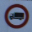

In [ ]:
print(data.iloc[y_test[0]])
X_test[0]

ClassId             38
SignName    Keep right
Name: 38, dtype: object


array([[[52, 40, 38],
        [51, 39, 37],
        [50, 38, 37],
        ...,
        [53, 44, 46],
        [54, 45, 48],
        [55, 45, 48]],

       [[59, 45, 42],
        [59, 44, 41],
        [56, 44, 40],
        ...,
        [52, 41, 42],
        [54, 44, 45],
        [55, 46, 45]],

       [[67, 49, 44],
        [65, 50, 45],
        [65, 49, 45],
        ...,
        [57, 42, 39],
        [55, 42, 40],
        [56, 43, 40]],

       ...,

       [[28, 24, 26],
        [29, 25, 27],
        [29, 27, 30],
        ...,
        [27, 24, 24],
        [28, 25, 24],
        [29, 27, 27]],

       [[31, 28, 29],
        [37, 32, 34],
        [41, 35, 37],
        ...,
        [34, 31, 28],
        [42, 40, 38],
        [47, 45, 45]],

       [[32, 29, 30],
        [33, 28, 28],
        [44, 34, 32],
        ...,
        [41, 40, 38],
        [44, 43, 43],
        [47, 46, 44]]], dtype=uint8)
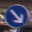

In [ ]:
print(data.iloc[y_test[2]])
X_test[2]

image label=[ClassId                        2
SignName    Speed limit (50km/h)
Name: 2, dtype: object]


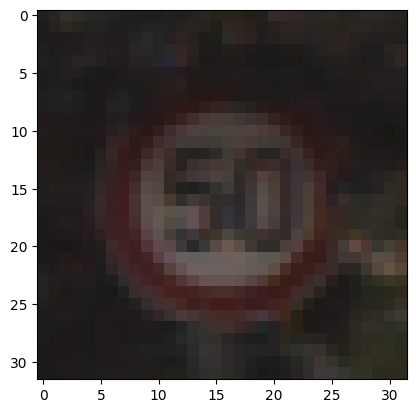

In [ ]:
index = random.randint(0,len(X_test))
plt.imshow(X_test[index])
print(f'image label=[{data.iloc[y_test[index]]}]')

#Image Preprocessing

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
def imagePreprocessing(img):
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  img = cv2.equalizeHist(img)
  img = img/255
  return img

In [ ]:
x_train_processed = np.array(list(map(imagePreprocessing, X_train)))
x_val_processed = np.array(list(map(imagePreprocessing, X_val)))
x_test_processed = np.array(list(map(imagePreprocessing, X_test)))

In [ ]:
# X_train_processed = x_train_processed.reshape(34799,32,32,1)
X_train_processed = tf.expand_dims(x_train_processed,axis=-1)
X_val_processed = tf.expand_dims(x_val_processed,axis=-1)
X_test_processed = tf.expand_dims(x_test_processed,axis=-1)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=43,activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_history=model.fit(X_train_processed,
                        y_train,epochs=10,
                        validation_data=(X_val_processed,y_val))

Epoch 1/10
1088/1088 [==============================] - 84s 76ms/step - loss: 0.8229 - accuracy: 0.7754 - val_loss: 0.3263 - val_accuracy: 0.9054
Epoch 2/10
1088/1088 [==============================] - 75s 69ms/step - loss: 0.1219 - accuracy: 0.9666 - val_loss: 0.1967 - val_accuracy: 0.9420
Epoch 3/10
1088/1088 [==============================] - 76s 70ms/step - loss: 0.0592 - accuracy: 0.9834 - val_loss: 0.2339 - val_accuracy: 0.9283
Epoch 4/10
1088/1088 [==============================] - 81s 75ms/step - loss: 0.0408 - accuracy: 0.9879 - val_loss: 0.2748 - val_accuracy: 0.9261
Epoch 5/10
1088/1088 [==============================] - 73s 67ms/step - loss: 0.0325 - accuracy: 0.9907 - val_loss: 0.1858 - val_accuracy: 0.9506
Epoch 6/10
1088/1088 [==============================] - 75s 69ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.1955 - val_accuracy: 0.9517
Epoch 7/10
1088/1088 [==============================] - 74s 68ms/step - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.2661 -

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.evaluate(X_test_processed,y_test)

395/395 [==============================] - 6s 15ms/step - loss: 0.3069 - accuracy: 0.9422


[0.3068758249282837, 0.9422011375427246]

<Axes: >

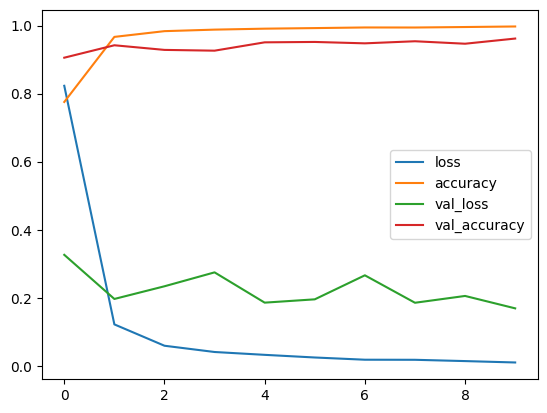

In [ ]:
pd.DataFrame(model_history.history).plot()

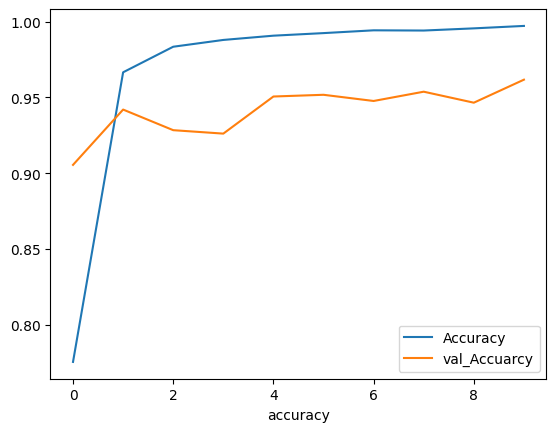

In [ ]:
epochs=np.array(range(10))
plt.plot(epochs, model_history.history["accuracy"],label='Accuracy')
plt.plot(epochs, model_history.history["val_accuracy"], label="val_Accuarcy")
plt.xlabel("accuracy")
plt.legend()

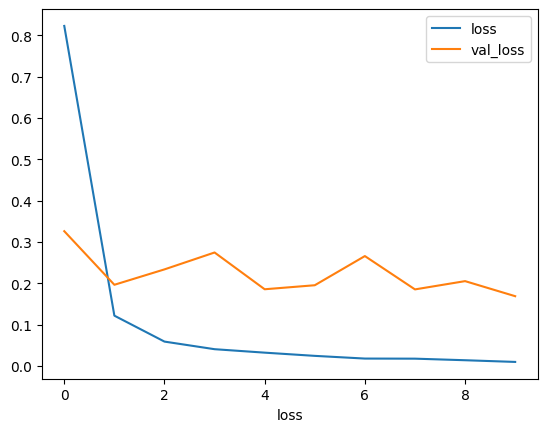

In [ ]:
epochs=np.array(range(10))
plt.plot(epochs, model_history.history["loss"],label='loss')
plt.plot(epochs, model_history.history["val_loss"], label="val_loss")
plt.xlabel("loss")
plt.legend()